# Evolution of identity and covert signaling model development

Breaking ground on agent-based version of the model in ["The Evolution of Covert Signaling"](https://www.nature.com/articles/s41598-018-22926-1). 


## Agents

In this model agents interact with one another, expressing $K$ static, randomly initialized traits, $\tau_{i} \in \{-1, 1\}^{K}$, and updating their interpersonal attitudes about other agents in the system when two agents interact. Attitudes about other agents are denoted $a_{i,t} \in \{-1, 0, 1\}^N$, where $N$ is the number of agents. 

An attitude of -1 indicates "disliking", an attitude of 0 indicates a "neutral" opinion, and an attitude of 1 indicates "liking". Each agent has a signalling strategy, "Overt" or "Covert", and a receiving strategy, which is either "Generous" or "Churlish". Generous agents have a neutral attitude towards others prior to dyadic interaction, and Churlish agents dislike others prior to dyadic interaction.

Finally, each agent $i$ has an accumulated payoff at time $t$, $\pi_{i,t}$.


## Dynamics

### Signaling and attitude formation

To begin, every agent produces a covert or overt signal depending on their signaling strategy. A proportion $R$ of the population recieves an overt signal when produced, and a proportion $r$ receives a covert signal when produced. If signaller and receiver are dissimilar, the receiver does not notice a covert signal.

Upon receiving a signal of similarity, attitudes are updated to liking. Upon receiving a signal of dissimilarity, attitudes are updated to disliking.

### Interaction round

A single interaction round consists of $n_r$ rounds of assortment into dyads, possible dyadic interaction, and then payoff resulting from dyadic interaction, if it occurs.

Dyadic interaction occurs with a probability that varies depending on whether two agents both like each other, one likes the other and the other
is neutral, both are neutral, or one or both dislikes the other. The probabilities are given in the table below. 

In that table the probability that paired agents interact is given in terms of $w_L$ and $w_D$. These are defined via the parameter $w$, which indicates the degree of homophily of agents---i.e., as $w$ increases, agents more often will reject interactions with agents they dislike and increasingly accept dyadic interactions with agents who they like. $w_L = 0.5 + w$ and $w_D = 0.5 - w$.


#### Probability of dyadic interaction
Attitudes  |  Pr(paired agents interact)  
----------:| :----------------:
Like, Like       |  $0.5 + w$       
Like, Neutral    | $0.5 + \frac{w}{2}$    
Neutral, Neutral | $0.5$  
Neutral, Dislike | $0.5 - \frac{w}{2}$       
Dislike, Dislike | $0.5 - w$      
Like, Dislike    | $0.5$

If the paired agents do have a dyadic interaction, then they will get a payoff based on their attitudes and whether they have similar or dissimilar traits, as summarized in the table below.

#### Payoff structure
Attitudes  |  Similar Pair  |  Dissimilar pair
----------:|:----------------:|:------------------:
Like, Like |  $1 + s$       |     NA
Like, Neutral | $1 + s$     |     NA
Neutral, Neutral | $1 + s$  |      1
Neutral, Dislike | NA       |    $1 - d$
Dislike, Dislike | NA       |    $1-d-\delta$
Like, Dislike    | $1 + s - d$ | $1 + s - d$



## Evolution

After each interaction round has completed its $n_r$ assortment/payoff rounds, every agent has the chance to evolve its receiving and signaling strategies. 

1. Agent $i$ selects another agent $j$ at random to potentially learn from
1. The probability that agent $i$ inspects agent $j$'s total payoff and strategies is given by the same probabilities of dyadic interaction given in the table above.
1. If $i$ inspects $j$, the probability agent $i$ adopts the strategies of agent $j$ will be a sigmoidal function of the proportion of accumulated payoffs, $\frac{\pi_{j,t}}{\pi_{i,t}}$.


## Parameters summary

- $N$: Population
- $n_r$: Number of assortment/payoff rounds per interaction round
- $K$: Number of traits per agent
- $R$: Proportion of agents receiving overt signals
- $r$: Proportion of agents receiving covert signals
- $s$: Benefit to similarity in dyadic interaction payoff
- $d$: Penalty when exactly one dissimilar agent dislikes its dyadic interaction partner
- $\delta$: Additional penalty when two dissimilar agents each dislike one another
- $w$: Assortment parameter that sets the relative likelihood that two similar agents will interact versus two dissimilar agents deciding to have a dyadic interaction once paired.

## Exploring sigmoids for probability 

In [1]:
import matplotlib.pyplot as plt

from scipy.stats import logistic


x = np.arange(-1.0, 5.0, 0.01)

# x = np.linspace(logistic.ppf(0.001, loc=2),
#                 logistic.ppf(0.999, loc=2), 1000)

# x = np.linspace(logistic.cdf(0.01),
#                 logistic.cdf(0.99), 1000)

print(logistic.ppf)
plt.plot(x, logistic.cdf(x, loc=2, scale=0.55),
        'r-', lw=5, alpha=0.6, label='logistic cdf')

<bound method rv_continuous.ppf of <scipy.stats._continuous_distns.logistic_gen object at 0x11cff3e50>>


0.014774031693273067
0.04742587317756678
0.9998766054240137


Text(0.5, 1.0, 'Probability switching given relative payoff.\n=1, payoffs identical\n< 1 means teacher worse than focal agent.')

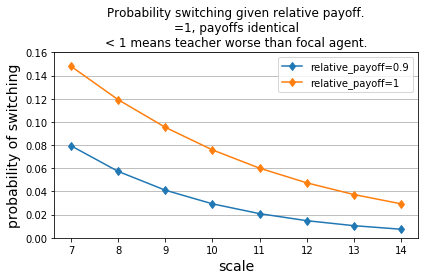

In [4]:
# Method 2: manual transformation of x, use 
# a special function in scipy; see 
# https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.special.expit.html

from scipy.special import expit

x = np.arange(-1, 5, .01)
loc = 2
scale = 5

def logistic(x, loc=0, scale=1):
    xtrans = scale * (x - loc)
    return expit(xtrans)

loc=1.25
scale=12
print(logistic(0.9, loc=loc, scale=scale))
print(logistic(1, loc=loc, scale=scale))
print(logistic(2, loc=loc, scale=scale))


# for scale in [8, 10, 12]:
# for xval in [0.9, 1, 2]:
for xval in [0.9, 1]:
    scales = list(range(7, 15))
    y = [logistic(xval, loc=loc, scale=scale) for scale in scales]
    plt.plot(scales, y, 'd-', label=f'relative_payoff={xval}')


# y = expit(xtrans)
# plt.plot(x, y, 'k-', lw=3)
plt.grid(axis='y')
plt.yticks(np.linspace(0, 0.16, 9));
plt.legend()
plt.xlabel('scale', size=14)
plt.ylabel('probability of switching', size=14)
plt.title('Probability switching given relative payoff.\n=1, payoffs identical\n< 1 means teacher worse than focal agent.')

Above I was figuring out how to write the function for the probability of a focal learner agent $j$ adopting the strategy of randomly-selected teacher agent $j$. `relative_payoff` above is $\rho_{ji} = \pi_j / \pi_i$.

I'm deciding to set the default 50% point, the "loc", to 1.25, and choose the scale to be 11 where probability of switching is one in fifty when $\rho_{ji} = 0.9$ ($j$ has worse payoff than $i$) and about three in fifty when $\rho_{ji} = 1.0$, ($\pi_i = \pi_j$).

In [1]:
import numpy as np
from model import Model

def proportion_covert(model):
    return (
        np.sum([a.signaling_strategy == "Covert" for a in model.agents]) / model.N
    )

def proportion_churlish(model):
    return (
        np.sum([a.receiving_strategy == "Churlish" for a in model.agents]) / model.N
    )


0.52


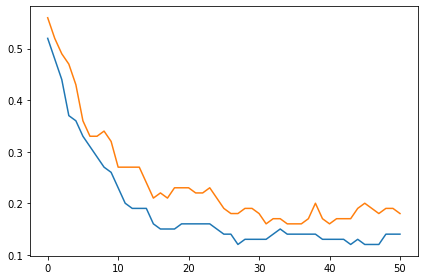

In [10]:
model = Model(homophily=0.0)

# Initial proportion of covert signallers.
init_covert = proportion_covert(model)
init_churlish = proportion_churlish(model)

print(init_covert)

n_block = 50
iter_per_block = 1

prop_covert = np.zeros((n_block + 1,))
prop_churlish = np.zeros((n_block + 1,))

prop_covert[0] = init_covert
prop_churlish[0] = init_churlish

for block_idx in range(n_block):
#     print(f"Running block {block_idx + 1}/{n_block}")
    model.run(iter_per_block)
    prop_covert[block_idx + 1] = proportion_covert(model)
    prop_churlish[block_idx + 1] = proportion_churlish(model)

plt.plot(prop_covert, label='prop covert')
plt.plot(prop_churlish, label='prop churlish')

In [2]:
# See if we can get some different model behavior with some
# weird parameters. Don't really know what the right thing is
# to try so I'll just try something.

model = Model(one_dislike_penalty=0.5, two_dislike_penalty=0.4, homophily=0.0)

# Initial proportion of covert signallers.
init_covert = proportion_covert(model)
init_churlish = proportion_churlish(model)

print(init_covert)

n_block = 50
iter_per_block = 1

prop_covert = np.zeros((n_block + 1,))
prop_churlish = np.zeros((n_block + 1,))

prop_covert[0] = init_covert
prop_churlish[0] = init_churlish

for block_idx in range(n_block):
#     print(f"Running block {block_idx + 1}/{n_block}")
    model.run(iter_per_block)
    prop_covert[block_idx + 1] = proportion_covert(model)
    prop_churlish[block_idx + 1] = proportion_churlish(model)

0.48


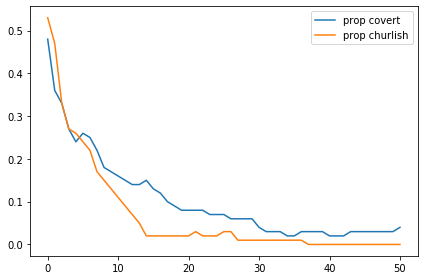

In [3]:
plt.plot(prop_covert, label='prop covert')
plt.plot(prop_churlish, label='prop churlish')
plt.legend()

In [4]:
model = Model(similarity_benefit=0.1, one_dislike_penalty=0.5, 
              two_dislike_penalty=0.4, homophily=0.0)

# Initial proportion of covert signallers.
init_covert = proportion_covert(model)
init_churlish = proportion_churlish(model)

print(init_covert)

n_block = 50
iter_per_block = 1

prop_covert = np.zeros((n_block + 1,))
prop_churlish = np.zeros((n_block + 1,))

prop_covert[0] = init_covert
prop_churlish[0] = init_churlish

for block_idx in range(n_block):
#     print(f"Running block {block_idx + 1}/{n_block}")
    model.run(iter_per_block)
    prop_covert[block_idx + 1] = proportion_covert(model)
    prop_churlish[block_idx + 1] = proportion_churlish(model)

0.46


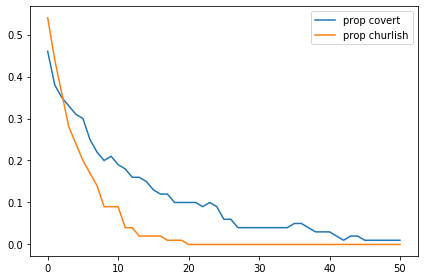

In [5]:
plt.plot(prop_covert, label='prop covert')
plt.plot(prop_churlish, label='prop churlish')
plt.legend()

In [6]:
model = Model(similarity_benefit=0.1, one_dislike_penalty=0.5, 
              two_dislike_penalty=0.4, homophily=0.0, prop_covert=0.05)

# Initial proportion of covert signallers.
init_covert = proportion_covert(model)
init_churlish = proportion_churlish(model)

print(init_covert)

n_block = 50
iter_per_block = 1

prop_covert = np.zeros((n_block + 1,))
prop_churlish = np.zeros((n_block + 1,))

prop_covert[0] = init_covert
prop_churlish[0] = init_churlish

for block_idx in range(n_block):
#     print(f"Running block {block_idx + 1}/{n_block}")
    model.run(iter_per_block)
    prop_covert[block_idx + 1] = proportion_covert(model)
    prop_churlish[block_idx + 1] = proportion_churlish(model)

0.44


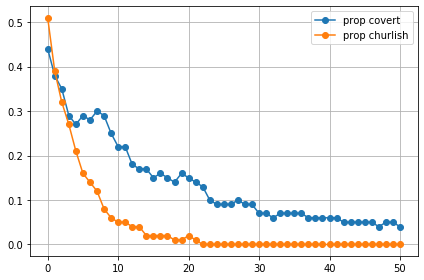

In [10]:
plt.plot(prop_covert, label='prop covert', marker='o')
plt.plot(prop_churlish, label='prop churlish', marker='o')
plt.grid()
plt.legend()

Don't know what to make of this, but this is good progress.

Next: See slides and paper and design computational experiments.